In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math

In [2]:
def binarize(gray_image, thresh_val):
    """ Function to threshold grayscale image to binary
        Sets all pixels lower than threshold to 0, else 255

        Args:
        - gray_image: grayscale image as an array
        - thresh_val: threshold value to compare brightness with

        Return:
        - binary_image: the thresholded image
    """

    gray_copy = gray_image.copy()
    gray_copy = gaussian_filter(gray_copy, sigma=1)
    mask = gray_copy > thresh_val
    binary_image = mask.astype(np.uint8) * 255

    return binary_image

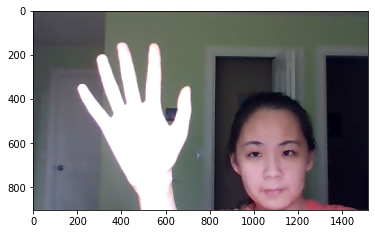

In [3]:
img1 = cv2.imread('5.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

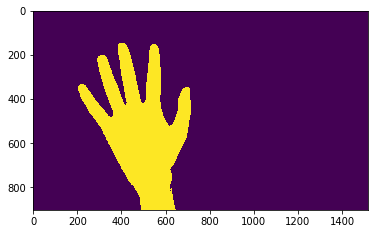

In [4]:
gray_image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
from scipy.ndimage import gaussian_filter
bin_img = binarize(gray_image, 200)

plt.imshow(bin_img)

[  0 255]


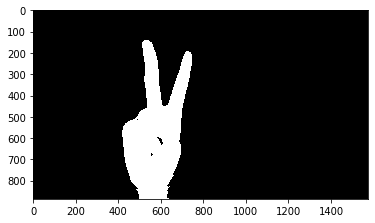

In [5]:
img1 = cv2.imread('2.jpg', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

gray_image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
from scipy.ndimage import gaussian_filter
bin_img = binarize(gray_image, 200)

plt.imshow(bin_img, 'gray')
print(np.unique(bin_img))

[139 139 139 ... 885 885 885] [530 531 532 ... 639 640 641]
[[530 139]
 [531 139]
 [532 139]
 ...
 [639 885]
 [640 885]
 [641 885]]
[641 497 459 455 439 437 434 433 432 431 430 429 426 419 419 422 512 514
 515 520 523 526 530 536 728 736 740 744 745 746 746 745 743 696 694 693]
693


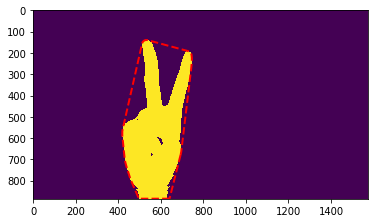

In [6]:
points_x, points_y = np.where(bin_img == 255)
print(points_x, points_y)
points = np.c_[ points_y, points_x ]
print(points)

from scipy import spatial
hull = spatial.ConvexHull(points)
# print(hull)
# for simplex in hull.simplices:
#     print(simplex)
#     plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

plt.imshow(bin_img)
print(points[hull.vertices,0])
print(points[hull.vertices,0][-1])
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
plt.plot(np.array([points[hull.vertices,0][-1], points[hull.vertices,0][0]]), 
         np.array([points[hull.vertices,1][-1], points[hull.vertices,1][0]]), 'r--', lw=2)
# plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
# plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

In [7]:
print(points[hull.vertices,0])
print(points[hull.vertices,1],)
outline = np.c_[ points[hull.vertices,0], points[hull.vertices,1] ]
# print(outline)

[641 497 459 455 439 437 434 433 432 431 430 429 426 419 419 422 512 514
 515 520 523 526 530 536 728 736 740 744 745 746 746 745 743 696 694 693]
[885 885 797 786 735 728 717 713 708 702 695 686 658 587 568 553 156 150
 148 143 141 140 139 139 191 195 199 206 213 223 235 251 272 665 675 679]


[  0. 255.]
(886, 1574)


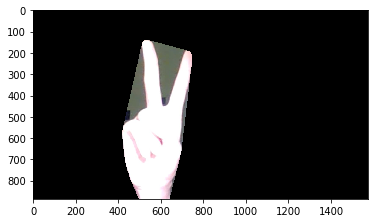

In [8]:
mask = np.zeros((bin_img.shape))
mask = cv2.fillPoly(mask, [np.int32(outline)], (255, 255, 255))
# mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
print(np.unique(mask))
mask = mask != 255
print(mask.shape)
# img_out = cv2.fillPoly(img1, [np.int32(outline)], (0, 0, 0))
# out_img = np.zeros(bin_img.shape)
# out_img[mask] = img1[mask]
mask_int = mask.astype('int')
out_img = img1.copy()
out_img[mask] = (0,0,0)
plt.imshow(out_img)

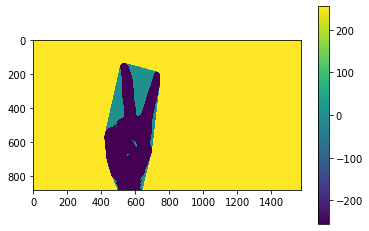

In [9]:
plt.imshow(mask_int*255 - bin_img)
plt.colorbar()

True

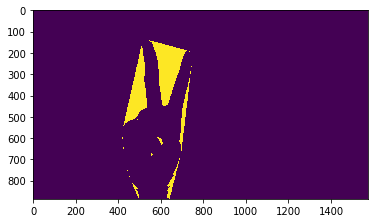

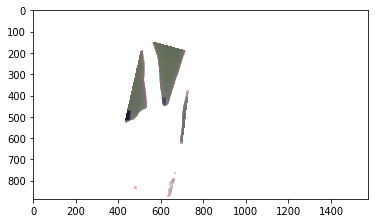

In [25]:
triangles = (mask_int*255 - bin_img) == 0
img_tri = img1.copy()
out_tri = (mask_int*255 - bin_img) != 0
img_tri[out_tri] = (255,255,255)
plt.imshow(triangles)

kernel = np.ones((10,10), dtype = 'uint8')
image_dilate = cv2.dilate(img_tri, kernel)  
image_erode = cv2.erode(image_dilate, kernel)  

plt.figure()
plt.imshow(image_erode)
cv2.imwrite('triangles.jpg', image_erode)

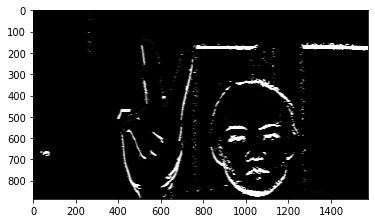

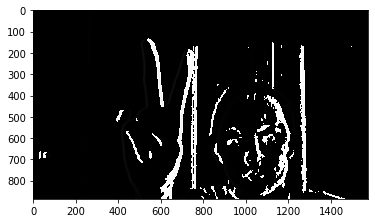

In [20]:
from scipy.ndimage.filters import gaussian_filter

i_x = gaussian_filter(gray_image, sigma=3, order=[1,0])
i_y =  gaussian_filter(gray_image, sigma=3, order=[0,1])

plt.imshow(i_x, cmap='gray')
plt.figure()
plt.imshow(i_y, cmap='gray')

[False  True]


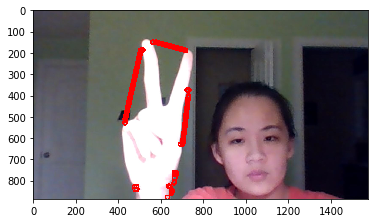

In [17]:
# gray = np.float32(image_erode)
gray = cv2.cvtColor(image_erode, cv2.COLOR_RGB2GRAY)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# print(np.unique(dst))
print(np.unique(dst>0.01*dst.max()))
# Threshold for an optimal value, it may vary depending on the image.
# img1[dst>0.01*dst.max()]=[0,0,255]
r,c = np.where(dst>0.01*dst.max())
# print(r,c)

c_img = img1.copy()
for ri,ci in zip(r,c):
    c_img = cv2.circle(c_img, (ci, ri), 10, (255,0,0), 2)
plt.figure()    
plt.imshow(c_img)    

[False  True]


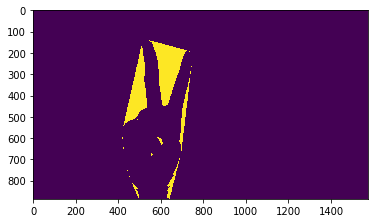

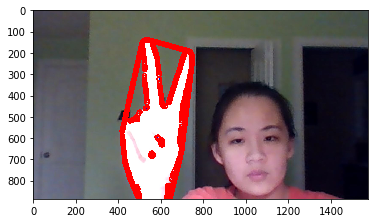

In [136]:
triangles = (mask_int*255 - bin_img) == 0
img_tri = img1.copy()
out_tri = (mask_int*255 - bin_img) != 0
img_tri[out_tri] = (255,255,255)
plt.imshow(triangles)

gray = np.float32(triangles)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# print(np.unique(dst))
print(np.unique(dst>0.01*dst.max()))
# Threshold for an optimal value, it may vary depending on the image.
# img1[dst>0.01*dst.max()]=[0,0,255]
r,c = np.where(dst>0.01*dst.max())
# print(r,c)

c_img = img1.copy()
for ri,ci in zip(r,c):
    c_img = cv2.circle(c_img, (ci, ri), 10, (255,0,0), 2)
plt.figure()    
plt.imshow(c_img)    

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[array([[[   0,    0]],

       [[   0,  885]],

       [[1573,  885]],

       [[1573,    0]]], dtype=int32), array([[[493, 877]],

       [[494, 876]],

       [[495, 876]],

       [[497, 878]],

       [[497, 880]],

       [[498, 879]],

       [[499, 879]],

       [[500, 880]],

       [[500, 881]],

       [[498, 883]],

       [[498, 884]],

       [[497, 885]],

       [[495, 883]],

       [[495, 881]],

       [[493, 879]]], dtype=int32), array([[[497, 874]],

       [[498, 873]],

       [[499, 874]],

       [[499, 875]],

       [[500, 876]],

       [[500, 878]],

       [[499, 879]],

       [[498, 879]],

       [[497, 878]]], dtype=int32), array([[[490, 870]],

       [[491, 869]],

       [[492, 869]],

   

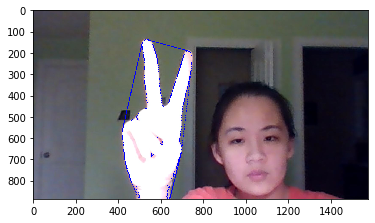

In [138]:
print(triangles)
img_copy = img1.copy()
imgray = cv2.cvtColor(img_tri, cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(triangles.astype('int')*255, 127, 255, 0)
# _, contours, _ = cv2.findContours(triangles, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
img_copy = cv2.drawContours(img_copy, contours[0], -1, (0,255,0), 3)
plt.imshow(img_copy)

[641 497 459 455 439 437 434 433 432 431 430 429 426 419 419 422 512 514
 515 520 523 526 530 536 728 736 740 744 745 746 746 745 743 696 694 693]
693


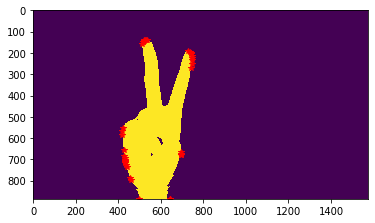

In [101]:
plt.imshow(bin_img)
print(points[hull.vertices,0])
print(points[hull.vertices,0][-1])
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r*', lw=2)
plt.plot(np.array([points[hull.vertices,0][-1], points[hull.vertices,0][0]]), 
         np.array([points[hull.vertices,1][-1], points[hull.vertices,1][0]]), 'r*', lw=2)
# plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)
# plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')
plt.show()

True
(886, 1574)
(886, 1574)
(886, 1574)


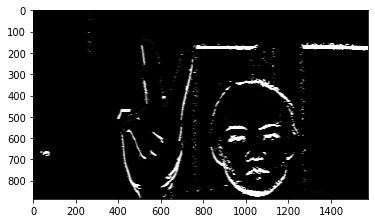

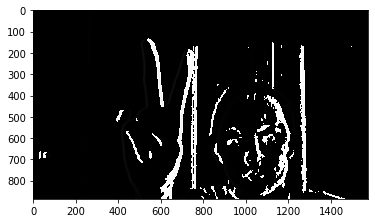

In [102]:
# find corners

from scipy.ndimage.filters import gaussian_filter

i_x = gaussian_filter(gray_image, sigma=3, order=[1,0])
i_y =  gaussian_filter(gray_image, sigma=3, order=[0,1])

plt.imshow(i_x, cmap='gray')
plt.figure()
plt.imshow(i_y, cmap='gray')

i_x2 = i_x * i_x
i_xy = i_x * i_y
i_y2 = i_y * i_y

i_yx = i_y * i_x
print(np.all(i_xy == i_yx))

def sum_patches(arr):
    arr_sum = np.zeros(arr.shape)
    for rowi in range(arr.shape[0]):
        for coli in range(arr.shape[1]):
            # sum up pixels wihtin 7 x 7 centered about the pixel
            r_min = max(0, rowi - 3)
            r_max = min(arr.shape[0], rowi + 3)
            c_min = max(0, coli - 3)
            c_max = min(arr.shape[1], coli + 3)
            sum = 0
            for r in range(r_min, r_max):
                for c in range(c_min, c_max):
                     sum += arr[r][c]
            arr_sum[rowi][coli] = sum
    #     arr_sum.append(row)
    print(arr_sum.shape)
    return arr_sum

i_x2_sum = sum_patches(i_x2)
i_xy_sum = sum_patches(i_xy)
i_y2_sum = sum_patches(i_y2)

i_x2_sum = gaussian_filter(i_x2, sigma=3)
i_xy_sum = gaussian_filter(i_xy, sigma=3)
i_y2_sum = gaussian_filter(i_y2, sigma=3)

In [ ]:
def find_eigenvalues(h11, h12, h21, h22):
    """ Computes the eigenvalues of the H matrix
        H = [[h11 h12],
             [h21 h22]]
        Args: 
            h11: The value in top left of the matrix
            h12: The value in top right of the matrix
            h21: The value in bottom left of the matrix
            h22: The value in bottom right of the matrix
        Returns:
            lambda_1: The first eigenvalue of the matrix
            lambda_2: The second eigenvalue of the matrix
    """

    # Finish the function
    lambda_1 = 1/2*( (h11 + h22) + np.sqrt( 4*h12*h21 + (h11 - h22)**2 ) )
    lambda_2 = 1/2*( (h11 + h22) - np.sqrt( 4*h12*h21 + (h11 - h22)**2 ) )
    
    return lambda_1, lambda_2

h_responses = np.zeros((rows, cols), dtype=np.float64)
k = 0.04
# k = 0.08

# i_x2_sum = gaussian_filter(i_x2, sigma=3)
# i_xy_sum = gaussian_filter(i_xy, sigma=3)
# i_y2_sum = gaussian_filter(i_y2, sigma=3)

for r in range(h_responses.shape[0]):
    for c in range(h_responses.shape[1]):
        h11 = i_x2_sum[r][c]
        h12 = i_xy_sum[r][c]
        h21 = h12
        h22 = i_y2_sum[r][c]
        lambda_1, lambda_2 = find_eigenvalues(h11, h12, h21, h22)
        h_responses[r][c] = lambda_1 * lambda_2 - k * (lambda_1 + lambda_2)**2

plt.imshow(h_responses)
plt.colorbar()

from scipy.ndimage.filters import maximum_filter

threshold = 0.08
# threshold = .6
h_responses = h_responses / np.max(h_responses)
h_responses[h_responses < threshold] = 0

suppressed = np.copy(h_responses)
filtered = maximum_filter(suppressed, (3, 3))
maxima = (suppressed == filtered)
suppressed[np.logical_not(maxima)] = 0

plt.figure(figsize=(12, 8))
plt.imshow(suppressed)

rs, cs = np.where(suppressed != 0)

img = color_image.copy()
for i in range(len(rs)):
    radius = 5
    color = (255, 0, 0)
    thickness = -1    
    image_circle = cv2.circle(img, (cs[i], rs[i]), radius, color, thickness)
    
plt.imshow( image_circle )